In [212]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from matplotlib import pyplot as plt
import datetime
import math
import pandas as pd
from scipy import stats

import seaborn as sn

from sklearn.tree import export_text

import statsmodels.api as sm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from numpy.random import seed
seed(1)
tf.random.set_seed(seed=0)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Drops specific values in a dataframe
# if flag = 1, drops values less than 'val'
# if flag = 0, drops values greater than 'val'
def drop_values(dataframe, column, val, flag):
    if flag:
        return dataframe.drop(dataframe[column < val].index)
    else:
        return dataframe.drop(dataframe[column > val].index)
    
# GET THE EGG SENSORS WITH AIRPOINTER
dataframe = pd.read_pickle('EGG2_DATASET.pkl')
dataframe

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
2020-05-06 16:00:00,20.936500,19.845833,1.188333,2.235000,2.576667,50.088667,1.426638,159.735500,1.416693,99177.978333,1.490,3.941,5.639,40.473,15.705,11.404,4.303,12.375,27.602
2020-05-06 17:00:00,20.838500,19.497333,1.536667,2.705000,3.088333,49.248667,1.426650,146.279333,1.416790,99149.185000,1.910,5.132,6.875,40.592,19.672,15.035,4.628,12.848,26.503
2020-05-06 18:00:00,18.088000,21.523500,1.903333,3.203333,3.665000,51.494000,1.426415,126.373333,1.416782,99160.285000,2.493,7.458,9.555,39.162,21.342,16.181,5.170,12.150,27.662
2020-05-06 19:00:00,15.246833,25.020167,2.448333,3.898333,4.298333,53.309000,1.426180,115.848667,1.416693,99190.693333,1.458,10.777,12.126,35.057,16.456,11.442,5.010,11.400,28.912
2020-05-06 20:00:00,13.793333,23.878000,0.660000,1.293333,1.510000,50.617667,1.426136,97.193000,1.416746,99246.608333,0.397,3.695,4.078,38.341,13.062,9.670,3.400,10.556,26.898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.382167,54.982833,4.668333,6.990000,7.683333,49.023000,1.426488,88.980500,1.417085,99420.093333,2.011,15.731,17.738,27.657,20.897,13.860,7.035,13.705,75.487
2020-06-02 10:00:00,19.135000,53.975500,9.786667,15.533333,17.430000,50.406167,1.426509,88.263833,1.417135,99319.851667,1.870,12.326,14.195,35.710,24.243,13.958,10.296,14.379,73.594
2020-06-02 11:00:00,22.748000,45.981500,3.601667,5.361667,5.930000,49.626000,1.426785,81.485500,1.417416,99221.360000,2.176,7.432,9.608,44.804,19.135,13.056,6.069,16.321,65.023
2020-06-02 12:00:00,27.486833,38.288000,5.126667,6.968333,7.471667,50.460500,1.427153,66.351167,1.417890,99105.386667,2.027,6.718,8.653,48.770,20.522,13.754,6.767,18.859,56.409


In [171]:
# Split the dataset into TRAINING and TESTING sets
train_dataset = drop_values(dataframe, dataframe.index, '2020-05-25 15:00:00', 0)
train_dataset = train_dataset.drop(columns=['NO', 'NOx', 
                                            'PM10_conc', 'PM10-2.5_conc','PM2.5_conc', 'O3', 
                                            'Air_Temperature', 'Relative_Humidity'])
test_dataset = drop_values(dataframe, dataframe.index, '2020-05-25 16:00:00', 1)
test_dataset = test_dataset.drop(columns=['NO', 'NOx', 
                                          'PM10_conc', 'PM10-2.5_conc','PM2.5_conc','O3', 
                                          'Air_Temperature', 'Relative_Humidity'])
train_stats = train_dataset.describe()
train_stats.pop("NO2")
train_stats = train_stats.transpose()
# Seperate the target values
# TRAINING SET
train_labels = train_dataset.pop('NO2')
# TESTING SET
test_labels = test_dataset.pop('NO2')

# # Split the dataset into TRAINING and TESTING sets
# train_dataset = drop_values(dataframe, dataframe.index, '2020-05-25 15:00:00', 0)
# train_dataset = train_dataset.drop(columns=['NO', 'NOx'])
# test_dataset = drop_values(dataframe, dataframe.index, '2020-05-25 16:00:00', 1)
# test_dataset = test_dataset.drop(columns=['NO', 'NOx'])
# train_stats = train_dataset.describe()
# train_stats.pop("NO2")
# train_stats = train_stats.transpose()
# # Seperate the target values
# # TRAINING SET
# train_labels = train_dataset.pop('NO2')
# # TESTING SET
# test_labels = test_dataset.pop('NO2')

train_dataset.head()

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa]
2020-05-06 16:00:00,20.936500,19.845833,1.188333,2.235000,2.576667,50.088667,1.426638,159.735500,1.416693,99177.978333
2020-05-06 17:00:00,20.838500,19.497333,1.536667,2.705000,3.088333,49.248667,1.426650,146.279333,1.416790,99149.185000
2020-05-06 18:00:00,18.088000,21.523500,1.903333,3.203333,3.665000,51.494000,1.426415,126.373333,1.416782,99160.285000
2020-05-06 19:00:00,15.246833,25.020167,2.448333,3.898333,4.298333,53.309000,1.426180,115.848667,1.416693,99190.693333
2020-05-06 20:00:00,13.793333,23.878000,0.660000,1.293333,1.510000,50.617667,1.426136,97.193000,1.416746,99246.608333


In [222]:
keras.backend.clear_session()
tf.random.set_seed(seed=0)
# Normalize the data
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

def build_model():
    # Define the model
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    # Define the optimizer
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    # Compile the model
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

model = build_model()
model.summary()

# The number of EPOCHS
EPOCHS = 1000
# Fit the model
# Define the early_stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(normed_train_data,
                    train_labels,
                    epochs=EPOCHS,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:114.1177,  mae:7.4693,  mse:114.1177,  val_loss:225.6729,  val_mae:11.4588,  val_mse:225.6729,  
................................

0.39606440061018866

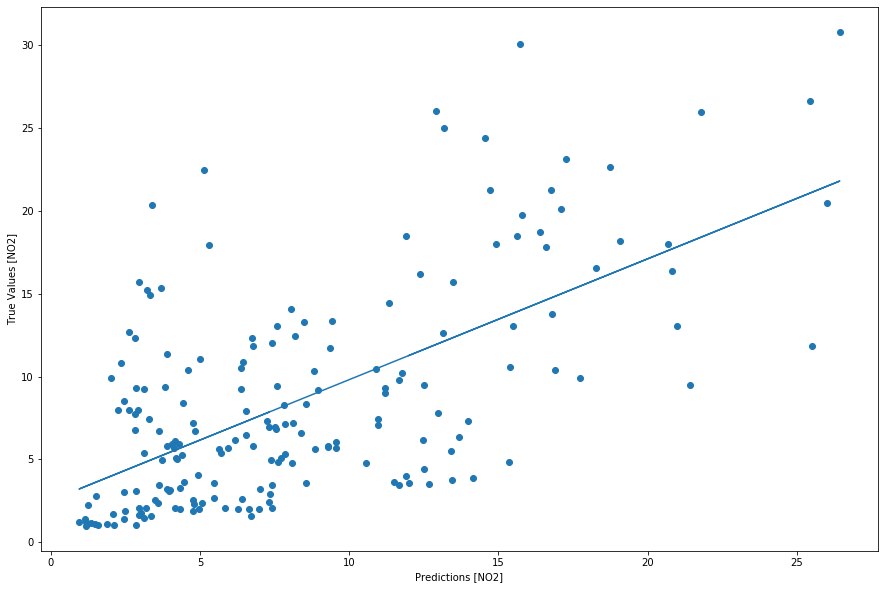

In [226]:
# Get the model predictions and make a linear regression for the R2 value
xValues = model.predict(normed_test_data).flatten()
yValues = test_labels
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
plt.figure(figsize=(15,10))
plt.scatter(xValues, yValues)
plt.plot(xValues,linear_regression.predict(xValues.reshape(-1,1)))
plt.xlabel('Predictions [NO2]')
plt.ylabel('True Values [NO2]')
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))